In [ ]:
# 선형 모델
Y= wx + b + w(오차항)
회귀식의 데이터가 많아질 경우 정규분포를 따르고,
전체 잔차의 합은 정규분포라는 가정하에 0에 가까워지므로 생략한다.
기울기는 관계, 절편은 출발점
x = 독립변수(feature)
y = 종속변수(label)
w 와 b가 좋고 나쁨을 평가할 수 있는 지표평가 -> 최소오차제곱(R^2) '=' cost function

다항식이 될 경우,
stepwise를 이용 = AIC값 (패널티)
하지만, 회귀식 과대 적합 문제 발생
==> ridge or lasso 회귀분석 (과대적합을 막기 위해 기울기 계수를 
                            두루뭉술하게 만들어 가는 과정(0에 가깝게= 영향력을 덜 주게))

In [2]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train,y_train)
lr.coef_ #계수 - 컬럼당
lr.intercept_ #절편
print(X_train)
print(y_train)


[[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [65]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
train = np.array(X)
train.reshape(-1,1)

array([[8.7015376 ],
       [3.90825773],
       [1.89362433],
       [3.28730045],
       [7.39333004],
       [2.98984649],
       [2.2575724 ],
       [9.84450732],
       [9.94589513],
       [5.48321616]])

In [13]:
#과적합
print("훈련셋",lr.score(X_train,y_train))
print("텟셋",lr.score(X_test,y_test))

훈련셋 0.952352643686424
텟셋 0.605775489293565


In [ ]:
## Ridge 회귀분석
과대적합을 막는 것 => 규제
L2규제를 사용 - alpha를 이용
alpha 값을 높이면 규제가 강해지면서 0에 가깝게 = 일반화

In [33]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train) #alpha 의 디폴트는 1
print("적합도:",ridge.score(X_train,y_train))
print("정확도:",ridge.score(X_test,y_test))
ridge

적합도: 0.8860578560395836
정확도: 0.7527139600306945


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("적합도:",ridge10.score(X_train,y_train))
print("정확도:",ridge10.score(X_test,y_test))

적합도: 0.7883461511233251
정확도: 0.6358967327447731


In [45]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("적합도:",ridge01.score(X_train,y_train))
print("정확도:",ridge01.score(X_test,y_test))

적합도: 0.9285782082010733
정확도: 0.7717933688844973


In [34]:
## Lasso 회귀분석

In [37]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train,y_train)
print("적합성:", lasso.score(X_train,y_train))
print("정확성:", lasso.score(X_test,y_test))
print(lasso.coef_)
print("사용한 특성의 수", np.sum(lasso.coef_ != 0))

적합성: 0.29323768991114607
정확성: 0.20937503255272294
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.

In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("적합성:", lasso001.score(X_train,y_train))
print("정확성:", lasso001.score(X_test,y_test))
print(lasso001.coef_)
print("사용한 특성의 수", np.sum(lasso001.coef_ != 0))

적합성: 0.896506955975129
정확성: 0.7656489887843521
[ -0.          -0.          -0.           0.          -0.
   0.          -0.          -1.30683918  10.94664016   0.
   0.           0.          -0.31532732  -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.91227147  -0.          -0.          -0.
  -0.           2.09533733  -0.           0.          -0.
   0.          -0.           0.           0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -4.08249984   0.
   6.66787706  -0.          -0.          -0.           0.
  -4.40104807  -2.10548411   3.77595291  -0.           4.38381849
   0.           0.           0.18662246  -0.          -1.17594281
  -4.29006257  -0.          -0.          -2.2160665   -0.
  -1.8820987   -0.          -0.          29.74050877  -2.08168251
   0.         -12.00134952 -11.14786769 -11.66008855  13.11691565
 -11.15372311  -0.          -0.           3.4756276

In [43]:
lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train,y_train)
print("적합성:", lasso001.score(X_train,y_train))
print("정확성:", lasso001.score(X_test,y_test))
print(lasso001.coef_)
print("사용한 특성의 수", np.sum(lasso001.coef_ != 0))

적합성: 0.896506955975129
정확성: 0.7656489887843521
[ -0.          -0.          -0.           0.          -0.
   0.          -0.          -1.30683918  10.94664016   0.
   0.           0.          -0.31532732  -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.91227147  -0.          -0.          -0.
  -0.           2.09533733  -0.           0.          -0.
   0.          -0.           0.           0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -4.08249984   0.
   6.66787706  -0.          -0.          -0.           0.
  -4.40104807  -2.10548411   3.77595291  -0.           4.38381849
   0.           0.           0.18662246  -0.          -1.17594281
  -4.29006257  -0.          -0.          -2.2160665   -0.
  -1.8820987   -0.          -0.          29.74050877  -2.08168251
   0.         -12.00134952 -11.14786769 -11.66008855  13.11691565
 -11.15372311  -0.          -0.           3.4756276

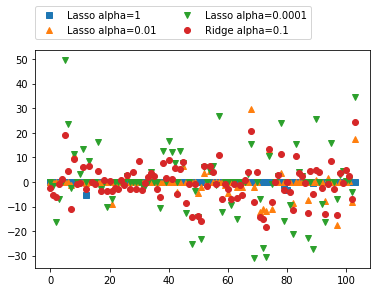

In [46]:
import matplotlib.pyplot as plt
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))

In [47]:
## 로지스틱 회귀분석

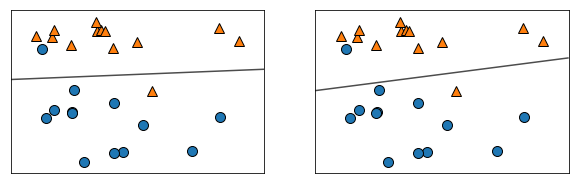

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize =(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)


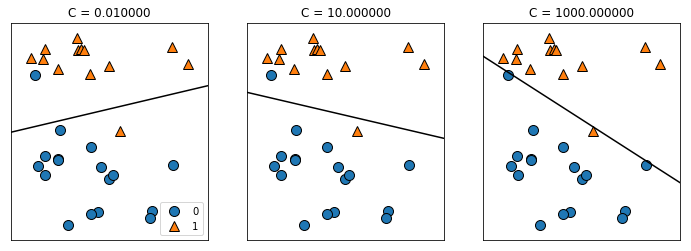

In [54]:
mglearn.plots.plot_linear_svc_regularization()

In [57]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target,
                                                random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print('훈련 셋 점수:', logreg.score(X_train,y_train))

훈련 셋 점수: 0.9553990610328639


In [58]:
# 여기서 C가 알파같은 의미를 가진다 cost 낮을 수록 규제를 강화한다.
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print('훈련 셋 점수:', logreg100.score(X_train,y_train))
print('텟 셋 점수:', logreg100.score(X_test,y_test))

훈련 셋 점수: 0.971830985915493
텟 셋 점수: 0.965034965034965


In [59]:
logreg01 = LogisticRegression(C=0.01).fit(X_train,y_train)
print('훈련 셋 점수:', logreg01.score(X_train,y_train))
print('텟 셋 점수:', logreg01.score(X_test,y_test))

훈련 셋 점수: 0.9342723004694836
텟 셋 점수: 0.9300699300699301


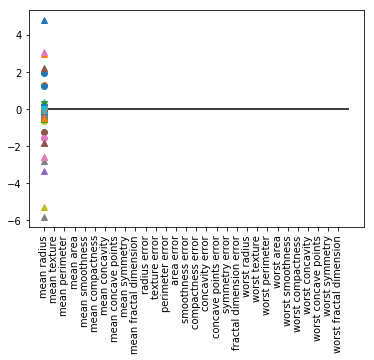

In [60]:
plt.plot(logreg.coef_, 'o', label="c=1")
plt.plot(logreg100.coef_, '^', label="c=100")
plt.plot(logreg01.coef_, 'v', label="c=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
